In [13]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [14]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('legend', fontsize=18)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util

import jupyterthemes as jt
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'


In [15]:
dfs_mc = {a : root_pandas.read_root("simul/Pairs/MC_Pairs_%s.root" %a,a) for a in "C D".split()}


#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

In [16]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mc.keys()):
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    dfs_mc[key] = R2h_module.applyCuts(dfs_mc[key], nomCuts=True)
    dfs_mc[key + '_2pi'] = R2h_module.applyCutsPair(dfs_mc[key],
                                                             nomCuts=True,h2Proton=False)
    dfs_mc[key + '_pi_p'] = R2h_module.applyCutsPair(dfs_mc[key],
                                                             nomCuts=True,h2Proton=True)
    #dfs_mc[key].eval('h2_mass_TOF = h2_p/h2_Betta*sqrt(1-h2_Betta**2)', inplace=True)
    #dfs_mc[key].eval('h1_mass_TOF = h1_p/h1_Betta*sqrt(1-h1_Betta**2)', inplace=True)



C
Entries before cut  1973271
Q2>1.0 and Q2<4.0 1973271  (100.00  %)
h1_p<5.0  1973256  (100.00  %)
inelasticity < 0.85 1973256  (100.00  %)
h1_pid = pions (trigger) 648037  (32.84  %)
Nu>2.2 and Nu<4.2 633901  (97.82  %)
10< h1_th<120 633901  (100.00  %)
Theta/P fiducial region selected for trigger 633901  (100.00  %)
Nom cuts for the trigger applied 311093  (49.08  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 311093  (100.00  %)
2.2 < nu < 4.2 311093  (100.00  %)
secondary hadrons are pions 140744  (45.24  %)
leading hadrons are pions 140744  (100.00  %)
0.2<h2_p<5.0 140744  (100.00  %)
0.2<h1_p<5.0 140744  (100.00  %)
10<h2_th<120 140744  (100.00  %)
Theta/P fiducial region selected 140744  (100.00  %)
10< h1_th<120 140744  (100.00  %)
Theta/P fiducial region selected for trigger 140744  (100.00  %)
Nom cuts for the pair applied (pi pi) 126457  (89.85  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 311093  (100.00  %)
2.2 < nu < 4.2 311093  (100.0

In [17]:
'h2_T4' in dfs_mc['C_2pi'].columns

True

In [21]:
import os, os.path

path = 'images/particle_misid/'
if not os.path.isdir(path):
    os.mkdir(path)

In [22]:
particle_names = {11:'$e^\\pm$',13:'$\\mu$',211:'$\\pi$', 321:'$K$', 2212:'$p$',9999:'unknown', -1:'tot. mis-id.'}
def idplot(slicevar,particle,target='D', slices=None, xlabel=None, ylabel=None, query=None, window = None,
           fillstyle=None,blankLabel=False,showLegend=True,nbins=10):
    for key in dfs_mc.keys():
        q = 'h1_truth_pid!=-9999 and h2_truth_pid!=-9999 and h2_T4>-999 and h2_z>0.07 and abs(h1_pid)==211'
        #/q+= "and nu<3.5 and nu>3.0"
        if '_' in key: continue
        if target not in key: continue
        df = dfs_mc[key+'_2pi'].query(q)
    
        if slices is None:
            yy = df.eval(slicevar)
            slices = np.linspace(yy.quantile(.005), yy.quantile(.995), nbins+1)
        
        if 'pass_recon' in df.keys():
            df = df.query('pass_recon')
        if query is not None:
            df = df.query(query)
            
        xx = df.eval(slicevar)
        if window is None:
            window = xx.quantile(0.005),xx.quantile(.995)
        slices = np.linspace(*window,nbins+1)
        
        xs = {}
        ys = {}
        dys = {}
        
        colors = {11:'k', 9999:'g',-1:'k',2212:'r',321:'b',11:'g',13:'y'}
        plotted_pids=[2212,321,11,-1]
        for j,truth_id in enumerate(plotted_pids):
            shift = (slices[1]-slices[0])*(j+1)/10 
            if truth_id == -1:
                shift = 0.0
            xs[truth_id] = []
            ys[truth_id] = []
            dys[truth_id] = []
            for i in range(len(slices)-1):
                df_slice = df.query(f'{slicevar}>{slices[i]} and {slicevar}<{slices[i+1]}')
                
                
                q_id = f'abs({particle}_truth_pid) == {truth_id}' if truth_id != -1\
                            else f'{particle}_truth_pid != {particle}_pid'
                n,d = len(df_slice.query(q_id)),len(df_slice)
                if d == 0:
                    continue
                xs[truth_id].append((slices[i]+slices[i+1])/2)
                ys[truth_id].append(n/d)
                dys[truth_id].append(np.sqrt(n*(d-n))/d**(3/2))
            if truth_id != -1:
                linestyle = ''
            else:
                linestyle='-'
            plt.errorbar(np.add(xs[truth_id],shift),
                         ys[truth_id],
                         dys[truth_id], marker='o',
                         linestyle=linestyle,
                             label=particle_names[truth_id] if not blankLabel else ' ',
                             color = colors[truth_id],
                         fillstyle=fillstyle)
    plt.gca().set_ylabel('fraction of events')
    plt.gca().set_xlabel(xlabel)
    plt.gca().set_ylim(1e-4,1)
    plt.gca().set_yscale('log')
    #plt.gca().axhline(0,color='0.7', linestyle='--')
    #plt.gca().axvline(0,color='0.7', linestyle='--')
    if showLegend:
        plt.legend()

In [23]:
def multipanel(slicevar, particles= 'h1 h2'.split(), titles='trigger associated'.split(),nbins=10, query='1==1',*varg,**kwarg):
    
    fig,axs = plt.subplots(2,len(particles), figsize=(6*len(particles), 10))
    for nucleus,fillstyle,label in ('D','full',True),:#('Pb','none',True):
        for i,particle in enumerate(particles):
            plt.sca(axs[0][i])
            plt.gca().set_title(titles[i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == 211 and {query}', target=nucleus, 
                   fillstyle=fillstyle,blankLabel=not label, showLegend=(i==1),nbins=nbins)
            plt.gca().set_xlabel(None)
            plt.sca(axs[1][i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == -211 and {query}', target=nucleus, 
                   fillstyle=fillstyle,blankLabel=not label,showLegend=False,nbins=nbins)
            if i != 0:
                axs[0][i].set_ylabel(None)
                axs[1][i].set_ylabel(None)
                
    axs[0][0].text(0,0.9,'identified as $\pi^+$',transform=axs[0][0].transAxes)
    axs[1][0].text(0,0.9,'identified as $\pi^-$',transform=axs[1][0].transAxes)
    fig.tight_layout()

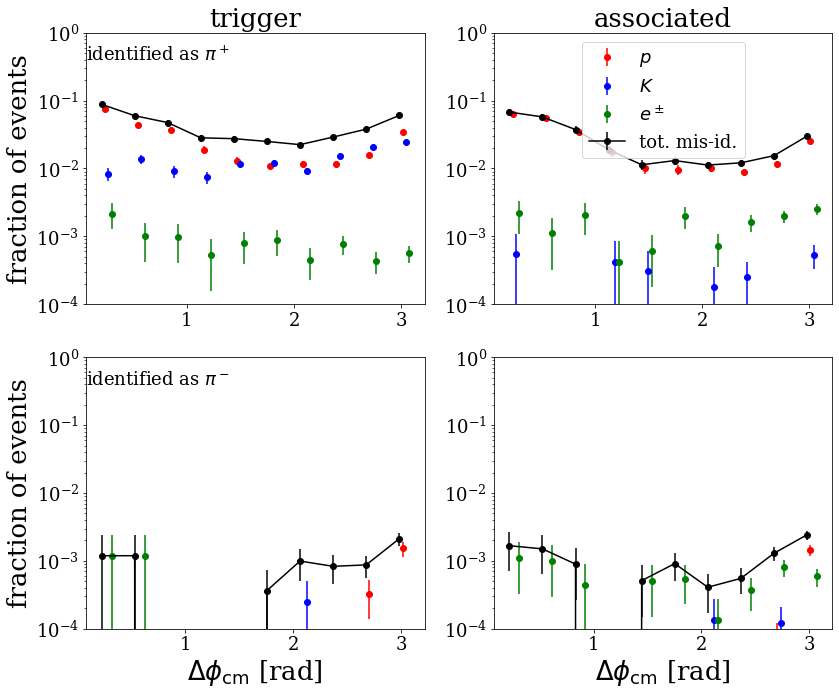

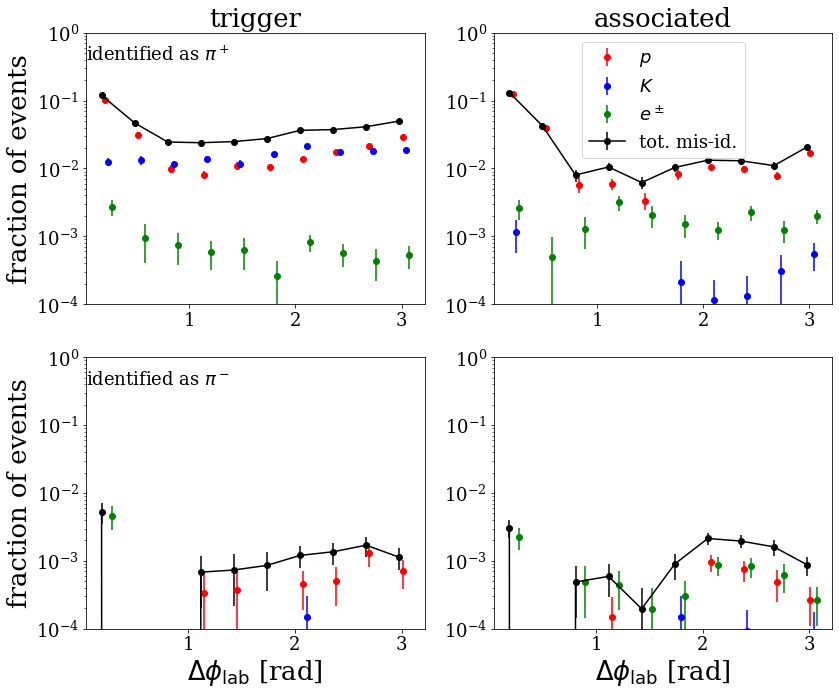

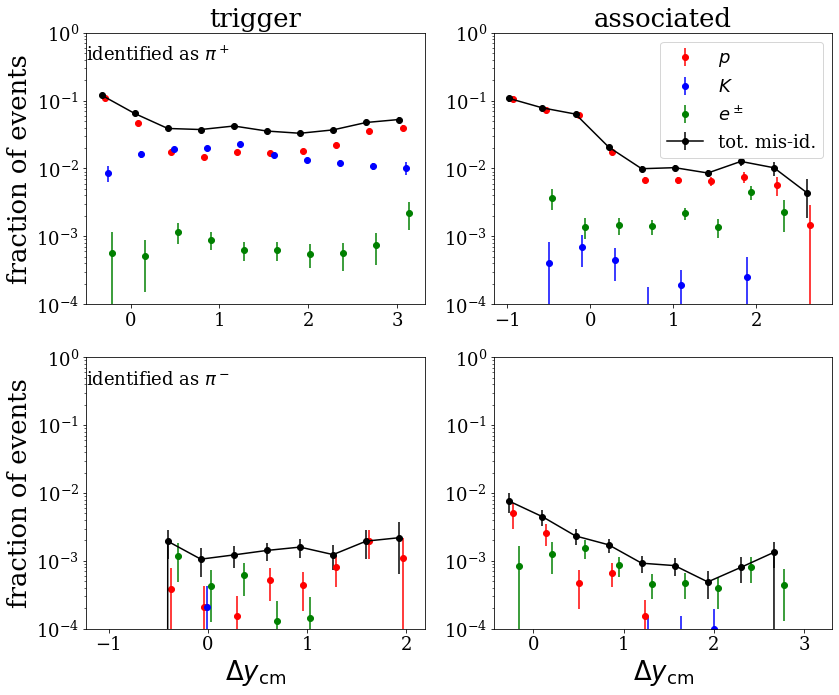

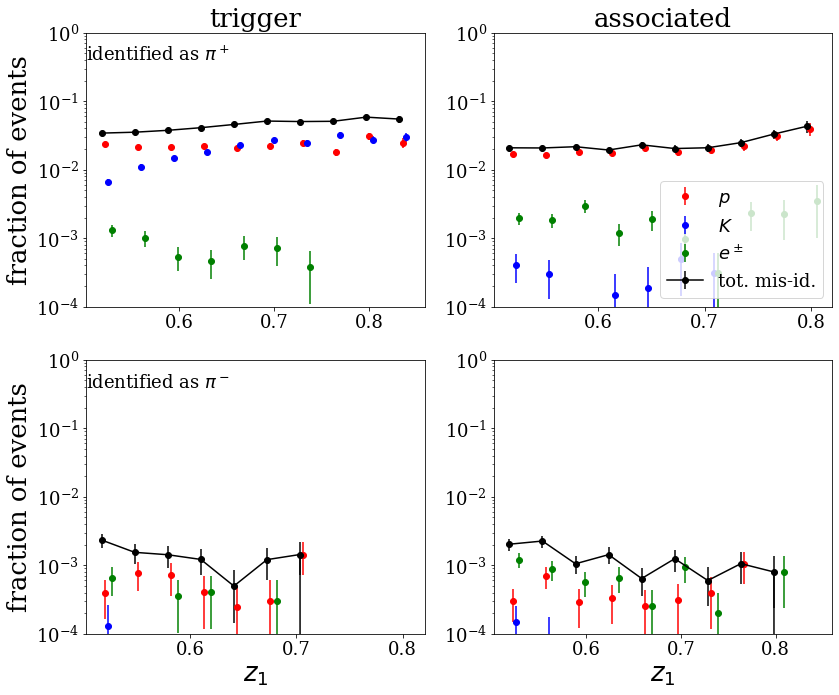

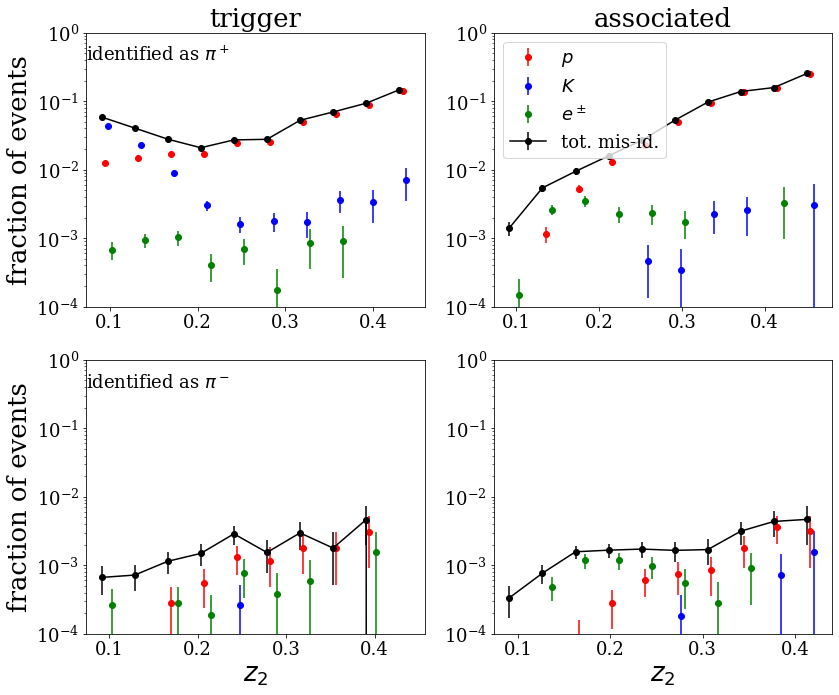

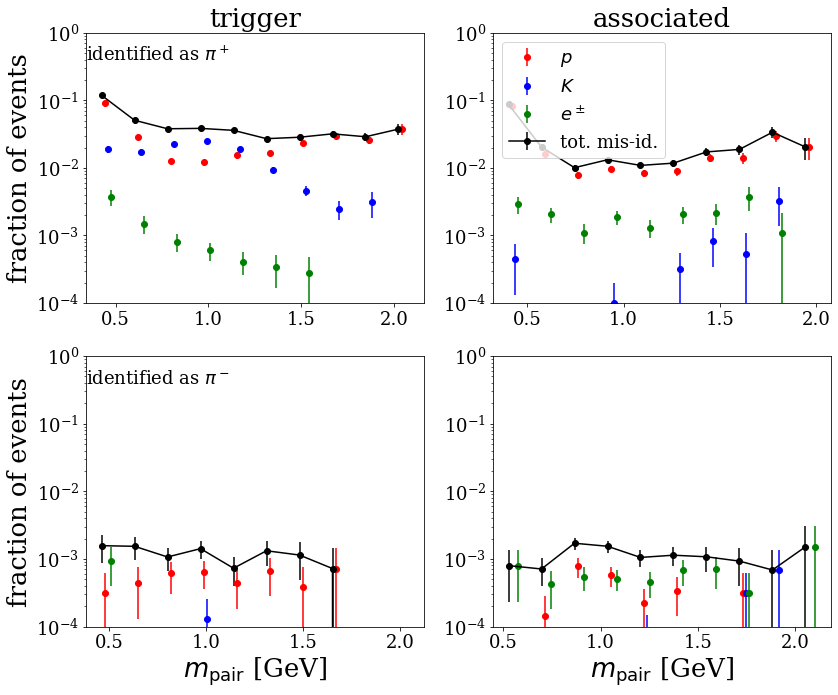

In [30]:
query = 'h1_p==h1_p'
#query = 'h1_FidCut and h2_FidCut'
multipanel('dphi',xlabel='$\Delta\phi_{\mathrm{cm}}$ [rad]',query=query)
plt.savefig('images/particle_misid/misid_dphi_cm.png',bbox_inches='tight')
plt.show()
multipanel('dphi_lab',xlabel= '$\Delta \phi_{\mathrm{lab}}$ [rad]',query=query)
plt.savefig('images/particle_misid/misid_dphi_lab.png',bbox_inches='tight')
plt.show()
multipanel('drap', xlabel='$\Delta y_{\mathrm{cm}}$',query=query)
plt.savefig('images/particle_misid/misid_drap.png',bbox_inches='tight')
plt.show()
multipanel('h1_z', xlabel='$z_1$',query=query)
plt.savefig('images/particle_misid/misid_z1.png',bbox_inches='tight')
plt.show()
multipanel('h2_z', xlabel='$z_2$',query=query)
plt.savefig('images/particle_misid/misid_z2.png',bbox_inches='tight')
plt.show()
multipanel('pair_mass', xlabel='$m_{\mathrm{pair}}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_pair_mass.png',bbox_inches='tight')
plt.show()


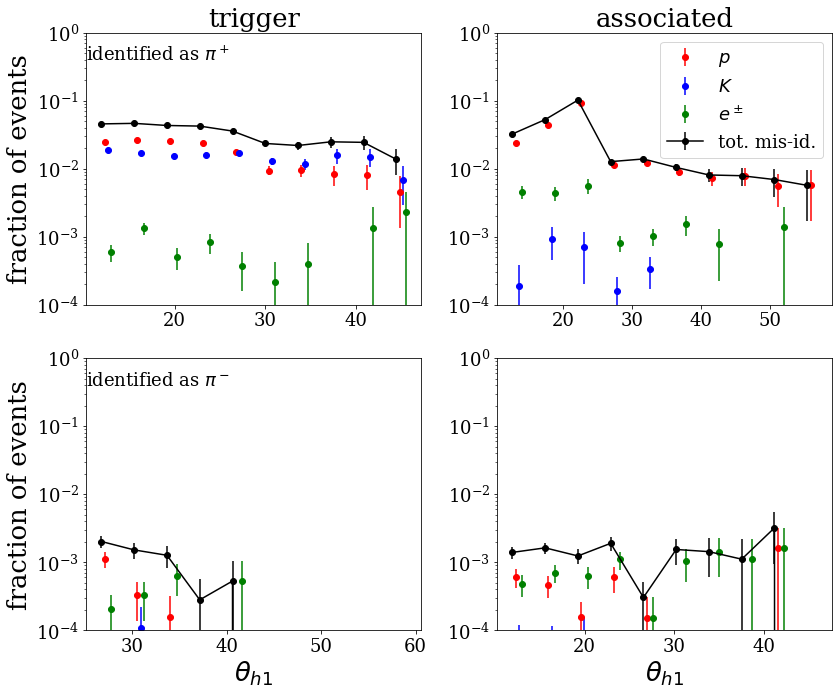

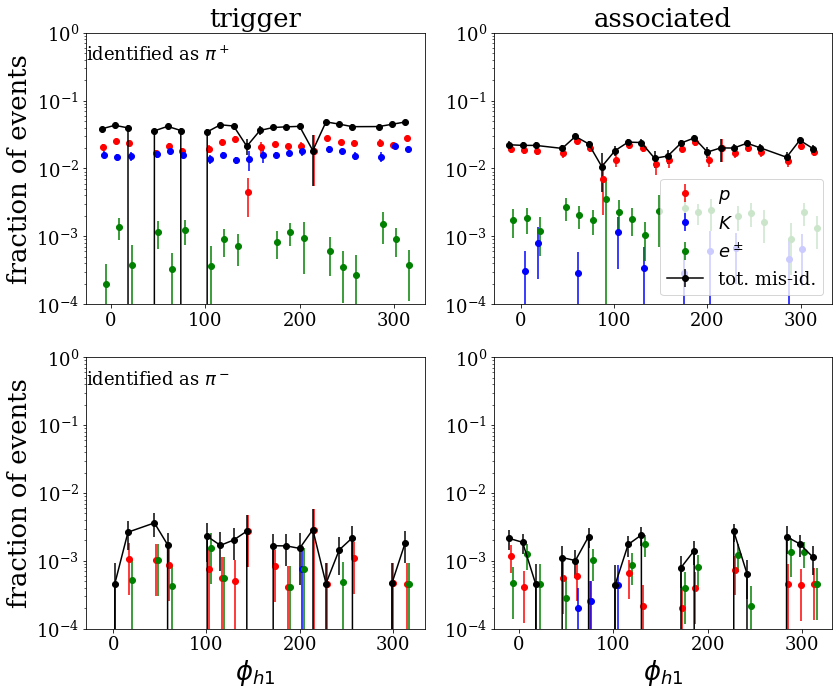

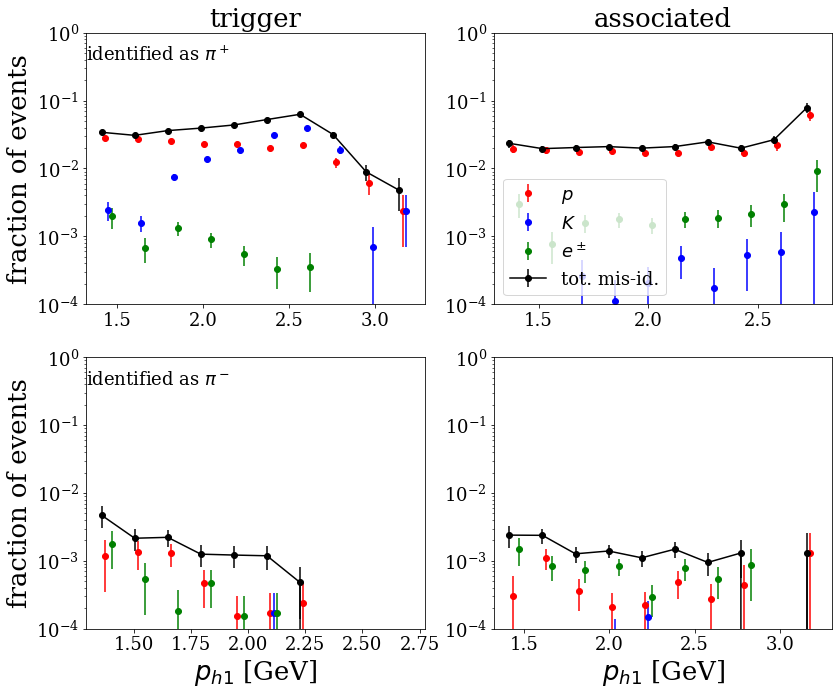

In [29]:
#query = 'h1_FidCut and h2_FidCut'
query = 'h1_p==h1_p'
multipanel('h1_th', xlabel='$\\theta_{h1}$',query=query)
plt.savefig('images/particle_misid/misid_h1_th.png',bbox_inches='tight')
plt.show()
multipanel('h1_ph', xlabel='$\\phi_{h1}$',query=query,nbins=24)
plt.savefig('images/particle_misid/misid_h1_ph.png',bbox_inches='tight')
plt.show()
multipanel('h1_p', xlabel='$p_{h1}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h1_p.png',bbox_inches='tight')
plt.show()

In [26]:
plt.hist2d(dfs_mc['Pb_2pi'].eval('h1_p'),dfs_mc['Pb_2pi'].eval('h1_p/h1_Betta*sqrt(1-h1_Betta**2)'),  
           norm = mpl.colors.LogNorm(), bins=100, range=((0,5),(0,1)))
plt.show()

plt.hist2d(dfs_mc['Pb_2pi'].query('h1_truth_pid==211').eval('h1_p'),dfs_mc['Pb_2pi'].query('h1_truth_pid==211').eval('h1_p/h1_Betta*sqrt(1-h1_Betta**2)'),  
           norm = mpl.colors.LogNorm(), bins=100, range=((0,5),(0,1)))
plt.show()

plt.hist2d(dfs_mc['Pb_pi_p'].eval('h2_p'),dfs_mc['Pb_pi_p'].eval('h2_p/h2_Betta*sqrt(1-h2_Betta**2)'),  
           norm = mpl.colors.LogNorm(), bins=100, range=((0,5),(0,1)))
plt.show()

KeyError: 'Pb_2pi'

In [ ]:
for df in dfs_mc['Pb_2pi'].query('h2_Betta>0'),:
    plt.hist(df.eval('h2_mass_TOF'),bins=100,histtype='step')
    plt.hist(df.query('abs(h2_truth_pid)!=211').eval('h2_mass_TOF'),
            bins=100,histtype='step')
    print(len(df))
#plt.gca().set_yscale('log')



(array([3.600e+01, 1.180e+02, 1.700e+02, 2.480e+02, 3.070e+02, 4.790e+02,
        7.090e+02, 1.012e+03, 1.477e+03, 2.168e+03, 3.665e+03, 3.237e+03,
        9.470e+02, 2.970e+02, 1.220e+02, 6.100e+01, 3.700e+01, 2.500e+01,
        1.300e+01, 6.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

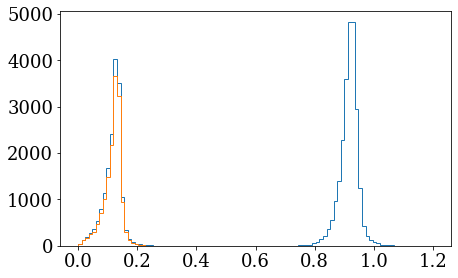

In [182]:
plt.hist(dfs_mc['Pb'].h2_mass_TOF,bins=100,histtype='step', range=(0,1.2))
plt.hist(dfs_mc['Pb_2pi'].h2_mass_TOF,bins=100,histtype='step', range=(0,1.2))

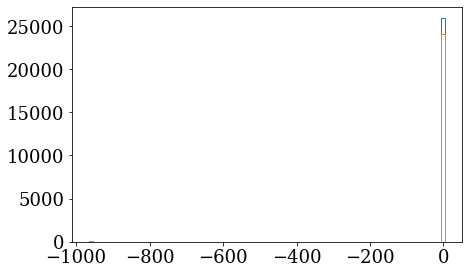

In [244]:
df = dfs_mc['Pb'].query('h2_z>0.3').query('h2_T4')
plt.hist(df.eval("h2_T4"),
         bins=100,histtype='step')
plt.hist(df.query('abs(h2_truth_pid)!=211').eval("h2_T4"),
         bins=100,histtype='step')
#plt.gca().set_yscale('log')
plt.show()

In [ ]:
df = dfs_mc['Pb'].query('h2_z>0.4')
plt.hist(df.eval("h2_T4"),
         bins=100,histtype='step')
plt.hist(df.query('abs(h2_truth_pid)==211').eval("h2_T4"),
         bins=100,histtype='step')
plt.gca().set_yscale('log')
plt.show()

(array([   3.,    3.,   10.,   40.,   46.,   76.,   68.,   69.,   78.,
          81.,   83.,  110.,   99.,  110.,  113.,  112.,  135.,  142.,
         131.,  170.,  157.,  148.,  160.,  203.,  183.,  217.,  205.,
         216.,  241.,  224.,  225.,  267.,  258.,  252.,  263.,  270.,
         284.,  302.,  315.,  312.,  312.,  319.,  352.,  362.,  381.,
         392.,  438.,  430.,  404.,  435.,  460.,  506.,  471.,  441.,
         470.,  499.,  505.,  516.,  493.,  521.,  504.,  535.,  526.,
         584.,  588.,  636.,  678.,  634.,  681.,  649.,  631.,  686.,
         674.,  688.,  663.,  659.,  667.,  612.,  621.,  630.,  640.,
         589.,  634.,  683.,  758.,  813.,  923., 1076., 1253., 1467.,
        1825., 1802., 1724., 1341.,  950.,  463.,  210.,   86.,   25.,
           5.]),
 array([0.45018333, 0.45611373, 0.46204414, 0.46797454, 0.47390494,
        0.47983535, 0.48576575, 0.49169615, 0.49762655, 0.50355696,
        0.50948736, 0.51541776, 0.52134817, 0.52727857, 0.53320897

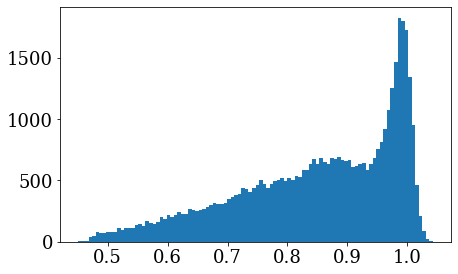

In [248]:
plt.hist(dfs_mc['Pb'].eval('h2_Betta'),bins=100)

(array([ 5.,  4.,  4.,  5., 11., 12., 17.,  9., 17., 14., 27., 13., 28.,
        17., 19., 27., 18., 32., 32., 27., 37., 25., 27., 29., 38., 22.,
        30., 34., 32., 35., 36., 38., 46., 44., 42., 35., 36., 40., 37.,
        29., 37., 31., 27., 42., 38., 28., 34., 38., 37., 36., 38., 45.,
        35., 41., 33., 32., 45., 38., 39., 39., 27., 23., 24., 31., 28.,
        34., 37., 27., 31., 26., 21., 32., 30., 26., 27., 33., 29., 26.,
        35., 17., 27., 22., 31., 22., 27., 25., 29., 14., 23., 24., 23.,
        23., 18., 17., 28., 19., 25., 20., 19., 11.]),
 array([2.38844705, 2.40656238, 2.42467771, 2.44279304, 2.46090837,
        2.47902371, 2.49713904, 2.51525437, 2.5333697 , 2.55148504,
        2.56960037, 2.5877157 , 2.60583103, 2.62394636, 2.6420617 ,
        2.66017703, 2.67829236, 2.69640769, 2.71452302, 2.73263836,
        2.75075369, 2.76886902, 2.78698435, 2.80509969, 2.82321502,
        2.84133035, 2.85944568, 2.87756101, 2.89567635, 2.91379168,
        2.93190701, 2.9500

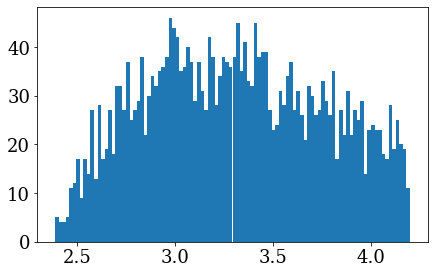

In [70]:
plt.hist(dfs_mc['C_2pi'].eval('nu'),bins=100)

In [12]:
def frac(df, q):
    d = len(df)
    n = len(df.query(q))
    return n/d, (np.sqrt(n*(d-n))/d**(3/2) if d>0 else 1)
def printfrac(txt,df,q,decimals=2):
    f = frac(df,q)
    print(txt + f"   %.{decimals}f+-%.{decimals}f%%"%(f[0]*100,f[1]*100))

df = dfs_mc['D_2pi'].query('h2_truth_pid > -9990 and h2_z>0.07')
printfrac('frac misidentified h2', df,'abs(h2_truth_pid) != 211')
printfrac('frac misidentified h2 pi+', df.query('h2_pid==211'),'abs(h2_truth_pid) != 211')
printfrac('frac misidentified h2 pi-',  df.query('h2_pid==-211'),'abs(h2_truth_pid) != 211')
df = dfs_mc['C_2pi'].query('h1_truth_pid > -9990')
printfrac('frac misidentified h1 tot', df,'abs(h1_truth_pid) != 211')
printfrac('frac misidentified h1 K', df,'abs(h1_truth_pid) == 321')
printfrac('frac misidentified h1 p',df,'abs(h1_truth_pid) == 2212')

printfrac('frac misidentified h1 pi+', df.query('h1_pid==211'),'abs(h1_truth_pid) != 211')
printfrac('frac misidentified h1 pi-', df.query('h1_pid==-211'),'abs(h1_truth_pid) != 211')

df = dfs_mc['C_2pi'].query('h1_truth_pid > -9990 and h2_truth_pid > -9990')
printfrac('frac at least one misidentified', df,'abs(h1_truth_pid) != 211 or abs(h2_truth_pid) != 211')



frac misidentified h2   0.97+-0.03%
frac misidentified h2 pi+   2.10+-0.06%
frac misidentified h2 pi-   0.11+-0.01%
frac misidentified h1 tot   2.74+-0.05%
frac misidentified h1 K   1.16+-0.03%
frac misidentified h1 p   1.52+-0.03%
frac misidentified h1 pi+   3.92+-0.07%
frac misidentified h1 pi-   0.08+-0.01%
frac at least one misidentified   3.61+-0.05%
